# Data Merge and EDA
This notebook merges the topic-labeled and framed datasets, and performs exploratory data analysis.

In [1]:
# import sys
# !{sys.executable} -m pip install pandas numpy matplotlib seaborn scipy

#Install packages
!pip install pandas numpy matplotlib seaborn scipy

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Display settings
pd.set_option('display.max_columns', None)
print('Libraries loaded successfully!')

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Libraries loaded successfully!


In [2]:
# Load the parquet files
print('Loading topic-labeled dataset...')
topic_df = pd.read_parquet('data/LRC_articles_topic_labeled.parquet')
print(f'Topic dataset loaded: {topic_df.shape[0]} rows, {topic_df.shape[1]} columns')
print(f'Columns: {list(topic_df.columns)}')
print()

print('Loading framed dataset...')
framed_df = pd.read_parquet('data/framed.parquet')
print(f'Framed dataset loaded: {framed_df.shape[0]} rows, {framed_df.shape[1]} columns')
print(f'Columns: {list(framed_df.columns)}')
print()

# print('Sample of topic dataset:')
# print(topic_df.head(2))
# print()

# print('Sample of framed dataset:')
# print(framed_df.head(2))

Loading topic-labeled dataset...
Topic dataset loaded: 124988 rows, 13 columns
Columns: ['uuid', 'url', 'outlet_name', 'bias', 'date', 'content', 'content_preprocessed', 'topic_top1', 'topic_top1_score', 'topic_top2', 'topic_top2_score', 'topic_top3', 'topic_top3_score']

Loading framed dataset...
Framed dataset loaded: 124988 rows, 10 columns
Columns: ['uuid', 'url', 'outlet_name', 'bias', 'date', 'content', 'content_preprocessed', 'frames', 'vector', 'probs']



In [3]:
# Merge the datasets on uuid
print('Merging datasets on uuid...')

# Keep only the unique columns from framed_df (frames, vector, probs)
# to avoid duplicate columns after merge
framed_df_subset = framed_df[['uuid', 'frames', 'vector', 'probs']]

merged_df = pd.merge(topic_df, framed_df_subset, on='uuid', how='inner')

print(f'Merged dataset shape: {merged_df.shape[0]} rows, {merged_df.shape[1]} columns')
print(f'Columns: {list(merged_df.columns)}')
print()

# print('Sample of merged dataset:')
# print(merged_df.head())
# print()

print('Data types:')
print(merged_df.dtypes)

Merging datasets on uuid...
Merged dataset shape: 124988 rows, 16 columns
Columns: ['uuid', 'url', 'outlet_name', 'bias', 'date', 'content', 'content_preprocessed', 'topic_top1', 'topic_top1_score', 'topic_top2', 'topic_top2_score', 'topic_top3', 'topic_top3_score', 'frames', 'vector', 'probs']

Data types:
uuid                     object
url                      object
outlet_name              object
bias                     object
date                     object
content                  object
content_preprocessed     object
topic_top1               object
topic_top1_score        float64
topic_top2               object
topic_top2_score        float64
topic_top3               object
topic_top3_score        float64
frames                   object
vector                   object
probs                    object
dtype: object


TOPIC LABEL DISTRIBUTIONS

Top 1 Topic Distribution:
topic_top1
elections and politics    21215
entertainment             20958
technology                18917
crime                     18537
finance                   14337
pandemic                   9315
healthcare                 7568
Middle East                5782
immigration                3850
China                      2944
Russia                     1565
Name: count, dtype: int64

Top 1 Topic Score Statistics:
count    124988.000000
mean          0.690839
std           0.238505
min           0.101928
25%           0.516704
50%           0.728786
75%           0.912053
max           0.997808
Name: topic_top1_score, dtype: float64



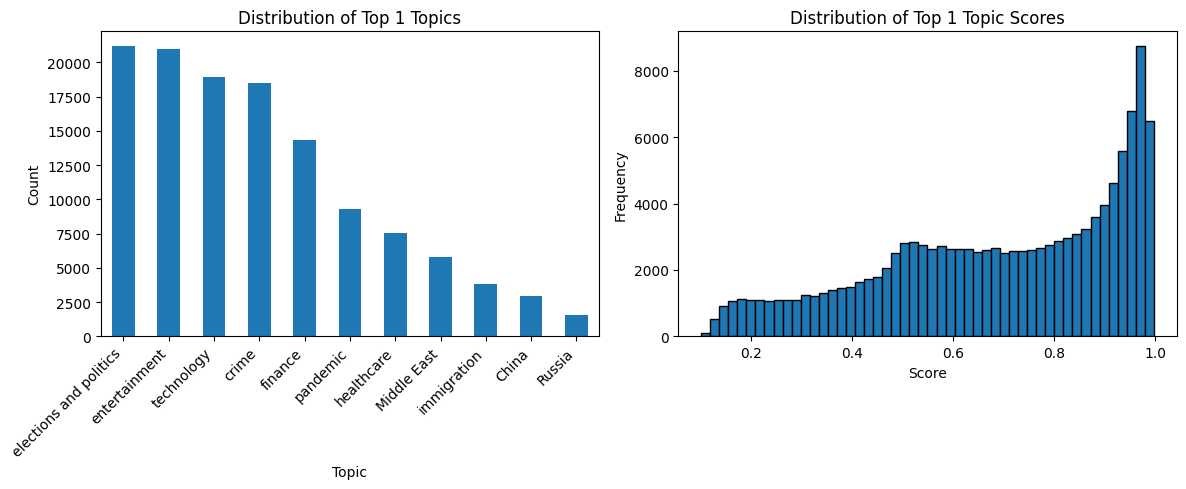



FRAME LABEL DISTRIBUTIONS

Frame Index Distribution (most probable frame per article):
max_frame_idx
0       431
1     10500
2      4238
3      6912
4      4819
5     10963
6     28289
7       492
8     18685
9      7948
10     5256
11    15181
12     2330
13     8944
Name: count, dtype: int64

Max Frame Probability Statistics:
count    124988.000000
mean          0.991771
std           0.057991
min           0.007330
25%           0.998940
50%           0.999800
75%           0.999960
max           1.000000
Name: max_frame_prob, dtype: float64



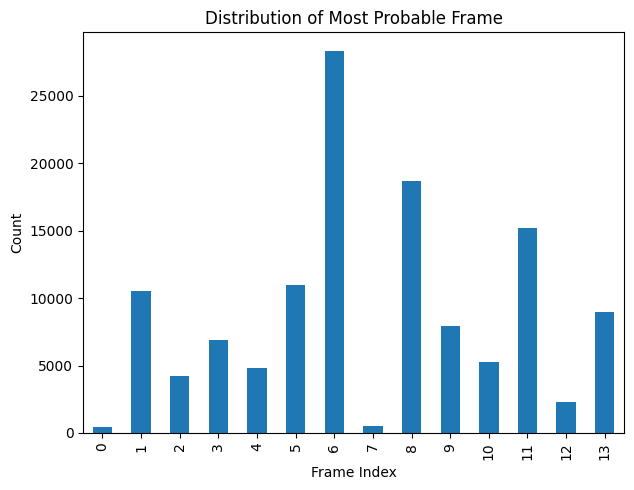

In [4]:
# Basic distributions - Topic Labels
print('='*60)
print('TOPIC LABEL DISTRIBUTIONS')
print('='*60)
print()

print('Top 1 Topic Distribution:')
print(merged_df['topic_top1'].value_counts())
print()

print('Top 1 Topic Score Statistics:')
print(merged_df['topic_top1_score'].describe())
print()

# Plot topic distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
merged_df['topic_top1'].value_counts().plot(kind='bar')
plt.title('Distribution of Top 1 Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.hist(merged_df['topic_top1_score'], bins=50, edgecolor='black')
plt.title('Distribution of Top 1 Topic Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print('\n')

# Frame labels distribution
print('='*60)
print('FRAME LABEL DISTRIBUTIONS')
print('='*60)
print()

# Get max probability and corresponding frame for each article
merged_df['max_frame_prob'] = merged_df['probs'].apply(lambda x: max(x))
merged_df['max_frame_idx'] = merged_df['probs'].apply(lambda x: np.argmax(x))

print('Frame Index Distribution (most probable frame per article):')
print(merged_df['max_frame_idx'].value_counts().sort_index())
print()

print('Max Frame Probability Statistics:')
print(merged_df['max_frame_prob'].describe())
print()

# Plot frame distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
merged_df['max_frame_idx'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Most Probable Frame')
plt.xlabel('Frame Index')
plt.ylabel('Count')

# plt.subplot(1, 2, 2)
# plt.hist(merged_df['max_frame_prob'], bins=50, edgecolor='black')
# plt.title('Distribution of Max Frame Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

SKEWNESS ANALYSIS

Topic Score Skewness:
topic_top1_score skewness: -0.5389
topic_top2_score skewness: 0.7679
topic_top3_score skewness: 1.4747

Note: Negative skew means left-tailed, Positive skew means right-tailed

Frame Probability Skewness:
max_frame_prob skewness: -11.3422

Individual Frame Probability Skewness:
Frame 0 probability skewness: 2.2752
Frame 1 probability skewness: 0.6945
Frame 2 probability skewness: 1.2970
Frame 3 probability skewness: 1.2286
Frame 4 probability skewness: 0.2941
Frame 5 probability skewness: 1.2881
Frame 6 probability skewness: -0.6259
Frame 7 probability skewness: 3.9387
Frame 8 probability skewness: -0.7246
Frame 9 probability skewness: 1.2632
Frame 10 probability skewness: 0.9242
Frame 11 probability skewness: 0.1203
Frame 12 probability skewness: 0.9762
Frame 13 probability skewness: 0.6999



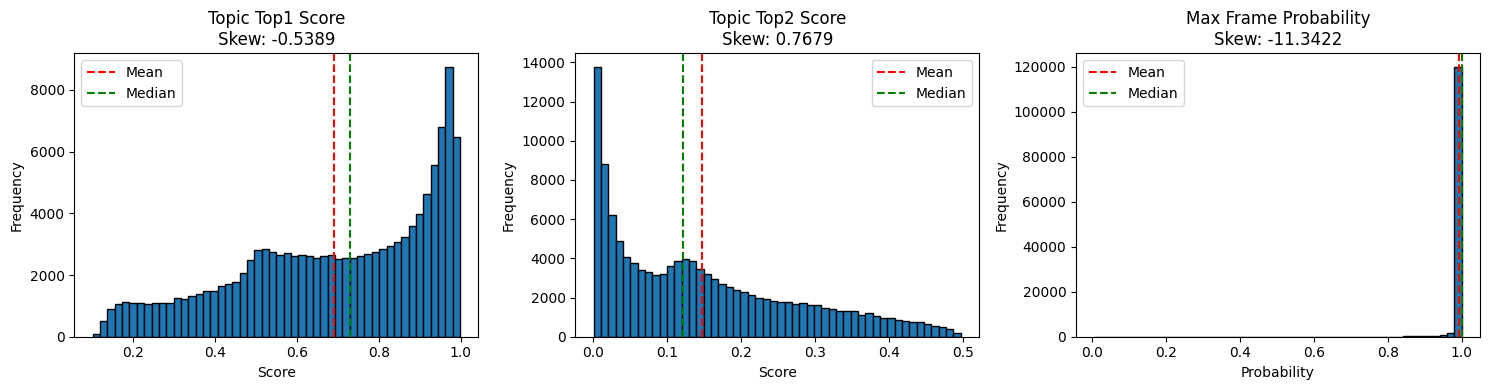

In [5]:
# Skewness analysis
print('='*60)
print('SKEWNESS ANALYSIS')
print('='*60)
print()

print('Topic Score Skewness:')
print(f'topic_top1_score skewness: {skew(merged_df["topic_top1_score"]):.4f}')
print(f'topic_top2_score skewness: {skew(merged_df["topic_top2_score"]):.4f}')
print(f'topic_top3_score skewness: {skew(merged_df["topic_top3_score"]):.4f}')
print()
print('Note: Negative skew means left-tailed, Positive skew means right-tailed')
print()

print('Frame Probability Skewness:')
print(f'max_frame_prob skewness: {skew(merged_df["max_frame_prob"]):.4f}')
print()

# Calculate skewness for each frame probability column
print('Individual Frame Probability Skewness:')
probs_array = np.array(merged_df['probs'].tolist())
for i in range(probs_array.shape[1]):
    frame_skew = skew(probs_array[:, i])
    print(f'Frame {i} probability skewness: {frame_skew:.4f}')
print()

# Visualize skewness
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(merged_df['topic_top1_score'], bins=50, edgecolor='black')
plt.axvline(merged_df['topic_top1_score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(merged_df['topic_top1_score'].median(), color='green', linestyle='--', label='Median')
plt.title(f'Topic Top1 Score\nSkew: {skew(merged_df["topic_top1_score"]):.4f}')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(merged_df['topic_top2_score'], bins=50, edgecolor='black')
plt.axvline(merged_df['topic_top2_score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(merged_df['topic_top2_score'].median(), color='green', linestyle='--', label='Median')
plt.title(f'Topic Top2 Score\nSkew: {skew(merged_df["topic_top2_score"]):.4f}')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(merged_df['max_frame_prob'], bins=50, edgecolor='black')
plt.axvline(merged_df['max_frame_prob'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(merged_df['max_frame_prob'].median(), color='green', linestyle='--', label='Median')
plt.title(f'Max Frame Probability\nSkew: {skew(merged_df["max_frame_prob"]):.4f}')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Check frame ambiguity
probs_array = np.array(merged_df['probs'].tolist())
first_max = probs_array.max(axis=1)
second_max = np.partition(probs_array, -2, axis=1)[:, -2]
gap = first_max - second_max

# Articles with small gaps are ambiguous
ambiguous = merged_df[gap < 0.1]
print(f"Ambiguous articles (gap <0.1): {len(ambiguous)}")

# Use only clear predictions
clear_frames = merged_df[gap > 0.1]
print(f"Clear predictions: {len(clear_frames)} ({len(clear_frames)/len(merged_df)*100:.1f}%)")

Ambiguous articles (gap <0.1): 116256
Clear predictions: 8732 (7.0%)


DATA AVAILABILITY OVER TIME

Date Range:
Earliest date: 2015-01-01 00:00:00
Latest date: 2021-12-31 00:00:00
Total time span: 2556 days

Articles per Month:
year_month
2015-01     730
2015-02     776
2015-03     993
2015-04     976
2015-05     827
           ... 
2021-08    1532
2021-09    1248
2021-10    3233
2021-11    6582
2021-12    4381
Freq: M, Length: 84, dtype: int64

Monthly Statistics:
Average articles per month: 1487.95
Median articles per month: 1291.00
Min articles in a month: 730
Max articles in a month: 6582



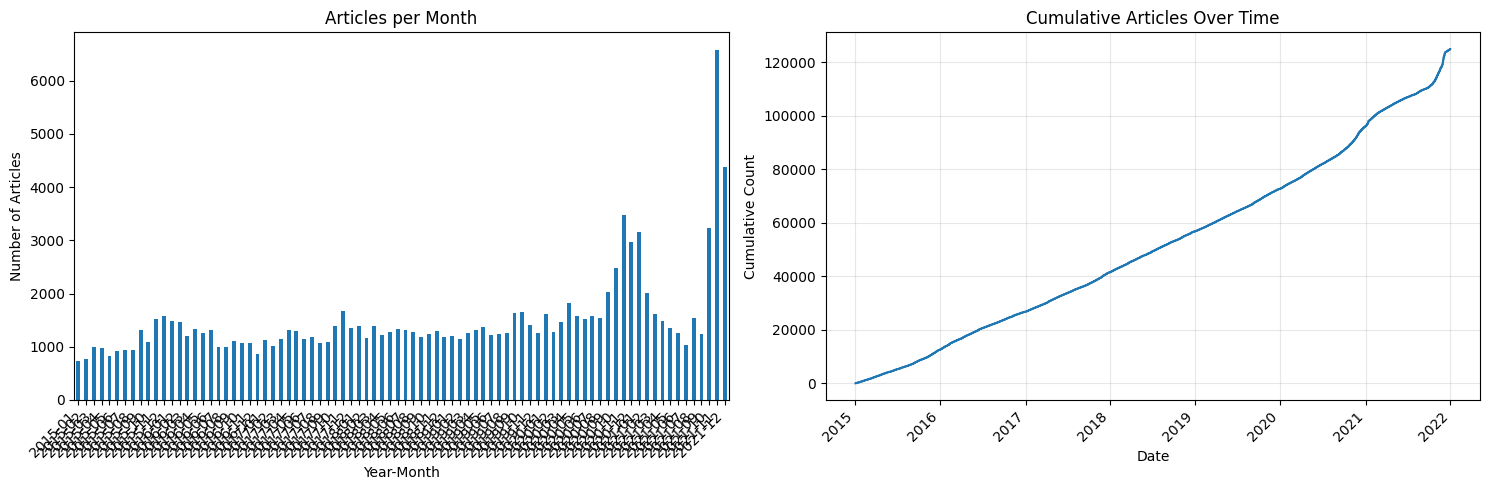

Checking for data gaps...
Number of days with no articles: 0
Percentage of days with data: 100.00%


In [6]:
# Data availability over time
print('='*60)
print('DATA AVAILABILITY OVER TIME')
print('='*60)
print()

# Convert date to datetime if not already
merged_df['date'] = pd.to_datetime(merged_df['date'])

print('Date Range:')
print(f'Earliest date: {merged_df["date"].min()}')
print(f'Latest date: {merged_df["date"].max()}')
print(f'Total time span: {(merged_df["date"].max() - merged_df["date"].min()).days} days')
print()

# Articles per month
merged_df['year_month'] = merged_df['date'].dt.to_period('M')
articles_per_month = merged_df.groupby('year_month').size()

print('Articles per Month:')
print(articles_per_month)
print()

print('Monthly Statistics:')
print(f'Average articles per month: {articles_per_month.mean():.2f}')
print(f'Median articles per month: {articles_per_month.median():.2f}')
print(f'Min articles in a month: {articles_per_month.min()}')
print(f'Max articles in a month: {articles_per_month.max()}')
print()

# Plot temporal distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
articles_per_month.plot(kind='bar')
plt.title('Articles per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
# Cumulative articles over time
merged_df_sorted = merged_df.sort_values('date')
plt.plot(merged_df_sorted['date'], range(1, len(merged_df_sorted) + 1))
plt.title('Cumulative Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check for gaps in data
print('Checking for data gaps...')
date_counts = merged_df.groupby('date').size()
all_dates = pd.date_range(start=merged_df['date'].min(), end=merged_df['date'].max())
missing_dates = all_dates.difference(date_counts.index)
print(f'Number of days with no articles: {len(missing_dates)}')
print(f'Percentage of days with data: {(1 - len(missing_dates)/len(all_dates)) * 100:.2f}%')

THRESHOLD ANALYSIS: 0.6 AND ABOVE

Original Dataset:
Total articles: 124988

After applying 0.6 threshold to topic_top1_score:
Remaining articles: 81171
Percentage retained: 64.94%
Articles removed: 43817

After applying 0.6 threshold to max_frame_prob:
Remaining articles: 124236
Percentage retained: 99.40%
Articles removed: 752

After applying 0.6 threshold to BOTH topic and frame:
Remaining articles: 80783
Percentage retained: 64.63%
Articles removed: 44205



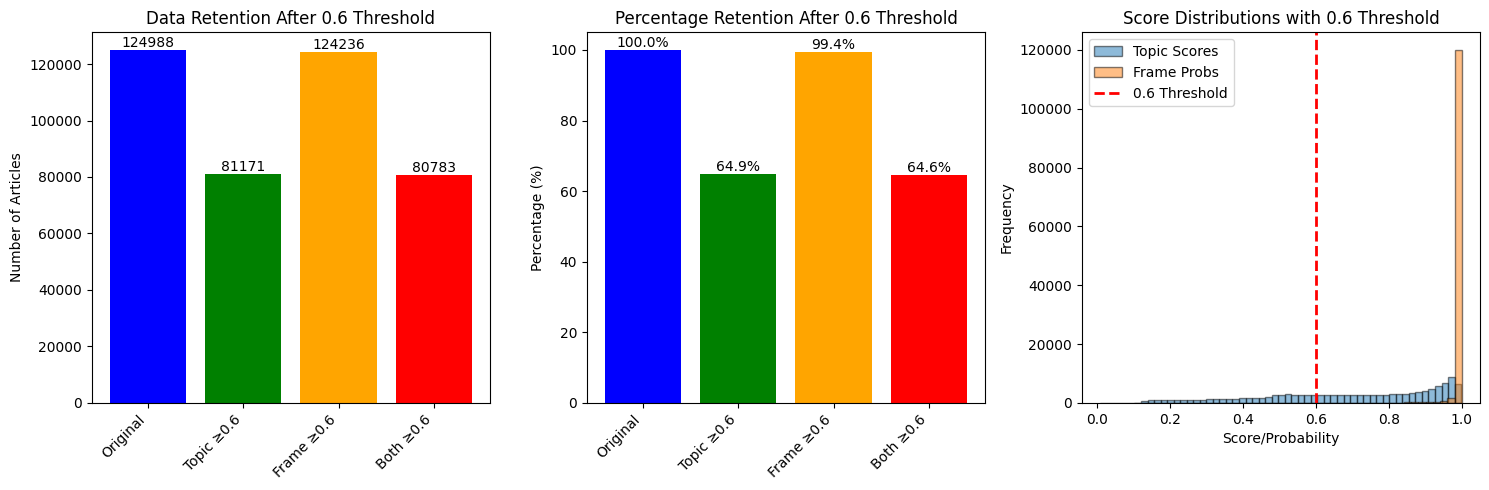


Summary:
Using 0.6 threshold on both labels, we retain 80,783 articles (64.63%)
This means we lose 44,205 articles (35.37%)


In [7]:
# Threshold analysis - 0.6 and above
print('='*60)
print('THRESHOLD ANALYSIS: 0.6 AND ABOVE')
print('='*60)
print()

print('Original Dataset:')
print(f'Total articles: {len(merged_df)}')
print()

# Filter by topic score threshold
topic_threshold = merged_df[merged_df['topic_top1_score'] >= 0.6]
print('After applying 0.6 threshold to topic_top1_score:')
print(f'Remaining articles: {len(topic_threshold)}')
print(f'Percentage retained: {(len(topic_threshold) / len(merged_df)) * 100:.2f}%')
print(f'Articles removed: {len(merged_df) - len(topic_threshold)}')
print()

# Filter by frame probability threshold
frame_threshold = merged_df[merged_df['max_frame_prob'] >= 0.6]
print('After applying 0.6 threshold to max_frame_prob:')
print(f'Remaining articles: {len(frame_threshold)}')
print(f'Percentage retained: {(len(frame_threshold) / len(merged_df)) * 100:.2f}%')
print(f'Articles removed: {len(merged_df) - len(frame_threshold)}')
print()

# Filter by both thresholds
both_threshold = merged_df[(merged_df['topic_top1_score'] >= 0.6) & 
                           (merged_df['max_frame_prob'] >= 0.6)]
print('After applying 0.6 threshold to BOTH topic and frame:')
print(f'Remaining articles: {len(both_threshold)}')
print(f'Percentage retained: {(len(both_threshold) / len(merged_df)) * 100:.2f}%')
print(f'Articles removed: {len(merged_df) - len(both_threshold)}')
print()

# Visualize threshold impact
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
categories = ['Original', 'Topic ≥0.6', 'Frame ≥0.6', 'Both ≥0.6']
counts = [len(merged_df), len(topic_threshold), len(frame_threshold), len(both_threshold)]
bars = plt.bar(categories, counts, color=['blue', 'green', 'orange', 'red'])
plt.title('Data Retention After 0.6 Threshold')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.subplot(1, 3, 2)
percentages = [(count / len(merged_df)) * 100 for count in counts]
bars = plt.bar(categories, percentages, color=['blue', 'green', 'orange', 'red'])
plt.title('Percentage Retention After 0.6 Threshold')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.subplot(1, 3, 3)
plt.hist(merged_df['topic_top1_score'], bins=50, alpha=0.5, label='Topic Scores', edgecolor='black')
plt.hist(merged_df['max_frame_prob'], bins=50, alpha=0.5, label='Frame Probs', edgecolor='black')
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=2, label='0.6 Threshold')
plt.title('Score Distributions with 0.6 Threshold')
plt.xlabel('Score/Probability')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

print('\nSummary:')
print(f'Using 0.6 threshold on both labels, we retain {len(both_threshold):,} articles ({(len(both_threshold) / len(merged_df)) * 100:.2f}%)')
print(f'This means we lose {len(merged_df) - len(both_threshold):,} articles ({((len(merged_df) - len(both_threshold)) / len(merged_df)) * 100:.2f}%)')

In [8]:
# Save the merged dataset
print('Saving merged dataset...')
merged_df.to_parquet('data/merged_topic_and_frames.parquet', index=False)
print('Merged dataset saved to: data/merged_topic_and_frames.parquet')
print()

Saving merged dataset...
Merged dataset saved to: data/merged_topic_and_frames.parquet



In [9]:
# Save the thresholded dataset
print('Saving thresholded dataset (both ≥0.6)...')
both_threshold.to_parquet('data/merged_topic_and_frames_filtered.parquet', index=False)
print('Filtered dataset saved to: data/merged_topic_and_frames_filtered.parquet')

Saving thresholded dataset (both ≥0.6)...
Filtered dataset saved to: data/merged_topic_and_frames_filtered.parquet
